In [1]:
## Vaishu Myadam (vmyadam1208@gmail.com)
## June, 2020

## Using Kaggle's fake news dataset to explore various models, find the most accurate one, and present results

In [15]:
# Necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [43]:
# Importing data

# Key: 1 = fake, 0 = real
train = pd.read_csv('fake-news/train.csv')
test = pd.read_csv('fake-news/test.csv')
test['label'] = 'Empty For Now'

train.info()
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
id        5200 non-null int64
title     5078 non-null object
author    4697 non-null object
text      5193 non-null object
label     5200 non-null object
dtypes: int64(1), object(4)
memory usage: 203.2+ KB


,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",Empty For Now
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,Empty For Now
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Empty For Now
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Empty For Now
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Empty For Now


In [47]:
# Data preprocessing

train = train.fillna(' ')
train['combined'] = train['title'] + train['author'] + train['text']

test = test.fillna(' ')
test['combined'] = test['title'] + test['author'] + test['text'] 

tfidf_transformer = TfidfTransformer(smooth_idf = False)
count_vectorizer = CountVectorizer(ngram_range = (1, 2))
counts = count_vectorizer.fit_transform(train['combined'].values)
tfidf = tfidf_transformer.fit_transform(counts)
training_labels = train['label'].values

X_train, X_test, y_train, y_test = train_test_split(tfidf, training_labels, random_state = 0)

In [ ]:
# Fitting models

ada_boost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3), n_estimators = 5)
ada_boost_clf.fit(X_train, y_train)

extra_trees_clf = ExtraTreesClassifier(n_estimators=5,n_jobs=4)
extra_trees_clf.fit(X_train, y_train)

logreg_clf = LogisticRegression(C = 1e5)
logreg_clf.fit(X_train, y_train)

naivebayes_clf = MultinomialNB()
naivebayes_clf.fit(X_train, y_train)

pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(X_train,y_train)

random_forest_clf = RandomForestClassifier(n_estimators = 5)
random_forest_clf.fit(X_train, y_train)

In [66]:
# Printing accuracies of models

print('\nAdaboost classifier\'s training set accuracy = {:.3f}'.format(ada_boost_clf.score(X_train, y_train)))
print('Adaboost classifier\'s testing set accuracy = {:.3f}'.format(ada_boost_clf.score(X_test, y_test)))

print('\nExtraTrees classifier\'s training set accuracy = {:.3f}'.format(extra_trees_clf.score(X_train, y_train)))
print('ExtraTrees classifier\'s testing set accuracy = {:.3f}'.format(extra_trees_clf.score(X_test, y_test)))

print('\nLogistic regression\'s training set accuracy = {:.3f}'.format(logreg_clf.score(X_train, y_train)))
print('Logistic regression\'s testing set accuracy = {:.3f}'.format(logreg_clf.score(X_test, y_test)))

print('\nNaive bayes classifier\'s training set accuracy = {:.3f}'.format(naivebayes_clf.score(X_train, y_train)))
print('Naive bayes classifier on testing set accuracy = {:.3f}'.format(naivebayes_clf.score(X_test, y_test)))

print('\nPassive aggressive classifier\'s training set accuracy = {:.3f}'.format(pac.score(X_train, y_train)))
print('Passive aggressive classifier\'s on testing set accuracy = {:.3f}'.format(pac.score(X_test, y_test)))

print('\nRandomforest classifier\'s training set accuracy = {:.3f}'.format(random_forest_clf.score(X_train, y_train)))
print('Randomforest classifier\'s testing set accuracy = {:.3f}'.format(random_forest_clf.score(X_test, y_test)))


Adaboost classifier's training set accuracy = 0.933
Adaboost classifier's testing set accuracy = 0.929

ExtraTrees classifier's training set accuracy = 1.000
ExtraTrees classifier's testing set accuracy = 0.841

Logistic regression's training set accuracy = 1.000
Logistic regression's testing set accuracy = 0.974

Naive bayes classifier's training set accuracy = 0.874
Naive bayes classifier on testing set accuracy = 0.779

Passive aggressive classifier's training set accuracy = 1.000
Passive aggressive classifier's on testing set accuracy = 0.977

Randomforest classifier's training set accuracy = 0.983
Randomforest classifier's testing set accuracy = 0.809


[[ 715  104]
 [2146 2235]]


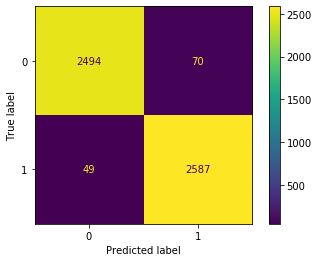

In [62]:
# Final model and predictions: Passive aggressive classifier

test_combined = count_vectorizer.transform(test['combined'].values)
predictions = pac.predict(test_combined)
submit = pd.read_csv("fake-news/submit.csv")
y_submit = submit['label']

print(confusion_matrix(predictions, y_submit, labels = [1, 0]))
plot_confusion_matrix(pac, X_test, y_test)

pac_result = pd.DataFrame(predictions,columns = ['label'])
pac_result['id'] = test['id']
pac_result.groupby('label').count()
pac_result.to_csv('pac_result.csv', index = False)